In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_fake = pd.read_csv('/content/drive/MyDrive/Kaggle/fake_foot/fake.csv')
df_real = pd.read_csv('/content/drive/MyDrive/Kaggle/fake_foot/real.csv')

In [5]:
df_fake.head()

,tweet
0,"the tongue of his condition, now i saw things ..."
1,"by god the great, after i saw the derby of wyd..."
2,"believe in god, this zamalek fans are as good ..."
3,the coach appeared in the media and told the t...
4,asno smito\nwhoever knows her tells me a massa...


In [6]:
pip install skimpy

In [7]:
from skimpy import skim
skim(df_fake)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 19999  │ │ string      │ 1     │                                                          │
│ │ Number of columns │ 1      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA     ┃ NA %         ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ tweet                    │     11 │        0.055 │                           26 │                   530000 │  │
│ └──────────────────────────┴────────┴──────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [8]:
skim(df_real)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 21869  │ │ string      │ 1     │                                                          │
│ │ Number of columns │ 1      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA     ┃ NA %         ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ tweet                    │      6 │        0.027 │                           27 │                   580000 │  │
│ └──────────────────────────┴────────┴──────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [9]:
df_fake.drop_duplicates(inplace=True)
df_real.drop_duplicates(inplace=True)
print(df_fake.duplicated().sum())
print(df_real.duplicated().sum())

0
0


In [10]:
Nan_fake = df_fake.index[df_fake.isnull().any(axis=1)]

In [11]:
df_fake.drop(Nan_fake, axis=0, inplace=True)

In [12]:
df_fake.isnull().sum()

tweet    0
dtype: int64

In [13]:
Nan_real = df_real.index[df_real.isnull().any(axis=1)]
df_real.drop(Nan_real, axis=0, inplace=True)
df_real.isnull().sum()

tweet    0
dtype: int64

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
from collections import Counter
import re
import nltk

2023-07-04 19:33:23.178257: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-04 19:33:24.462299: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
def cleaning(text):
  text=text.lower()

  text=re.sub("\[.*#&]"," ",text)

  text=re.sub("https?://\S+|www\.\S+","",text)

  text=re.sub("[^a-zA-Z0-9\s]+","",text)

  text=re.sub('\w*\d\w*', '', text)

  sw = set(stopwords.words('english'))

  w = text.split()

  w_without_sw = [i for i in w if i not in sw]
  text = ' '.join(w_without_sw)
  text = re.sub('\s+', ' ', text).strip()

  return text

In [17]:
df_fake['tweet'] = df_fake['tweet'].apply(cleaning)

In [18]:
df_fake

,tweet
0,tongue condition saw things confused shame you...
1,god great saw derby wydad alraja almaghribi be...
2,believe god zamalek fans good swear god celebr...
3,coach appeared media told truth got told swear...
4,asno smito whoever knows tells massage whoever...
...,...
19994,hitting referee
19995,instead assassinating assassinated alhilal
19996,honestly goalkeeper deal best alfath
19997,haha goal bangura


In [19]:
df_real['tweet'] = df_real['tweet'].apply(cleaning)

In [20]:
df_real

,tweet
0,sun downs technical director alahly respected ...
1,shawky gharib tie enppi goal return golden square
2,egyptian sports news today wednesday many impo...
3,main referees committee egyptian football asso...
4,haji bari striker future team undergoing final...
...,...
21864,shawky gharib excluded players current camp li...
21865,dina musharraf resumes career singapore table ...
21866,indeed alahly ended agreement ricardo soares a...
21867,hazem imam captain zamalek decided retire foot...


In [21]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk

nltk.download('wordnet')

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(lemmatized)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [22]:
df_fake['tweet'] = df_fake['tweet'].apply(lemmatize_text)
df_fake

,tweet
0,tongue condition saw thing confused shame youn...
1,god great saw derby wydad alraja almaghribi be...
2,believe god zamalek fan good swear god celebra...
3,coach appeared medium told truth got told swea...
4,asno smito whoever know tell massage whoever d...
...,...
19994,hitting referee
19995,instead assassinating assassinated alhilal
19996,honestly goalkeeper deal best alfath
19997,haha goal bangura


In [23]:
df_real['tweet'] = df_real['tweet'].apply(lemmatize_text)
df_real

,tweet
0,sun down technical director alahly respected u...
1,shawky gharib tie enppi goal return golden square
2,egyptian sport news today wednesday many impor...
3,main referee committee egyptian football assoc...
4,haji bari striker future team undergoing final...
...,...
21864,shawky gharib excluded player current camp lis...
21865,dina musharraf resume career singapore table t...
21866,indeed alahly ended agreement ricardo soares a...
21867,hazem imam captain zamalek decided retire foot...


In [24]:
df_fake['target'] = 0
df_real['target'] = 1
df = pd.concat([df_fake, df_real], axis=0)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [25]:
df

,tweet,target
0,come john nabi chief came zagazig haha,0
1,hahahaha listen shouting little one told belie...,0
2,imagine go back watching egyptian league haha ...,0
3,referee match argentina colombia determined sp...,1
4,departure mansour required audience mansour de...,0
...,...,...
40819,latest fashion programme refereeing breaking p...,0
40820,fan medium ahly justify action owais he normal...,0
40821,confirmed imad hamdi ismaili midfielder absent...,1
40822,wish fan zamalek going match today would enlig...,0


In [26]:
from collections import Counter

def plot_most_common_words(df, target, n=10):
    counter = Counter(" ".join(df[df.target == target]["tweet"]).split())
    most_common = counter.most_common(n)
    words, counts = zip(*most_common)

    plt.barh(words, counts)
    plt.xlabel('Counts')
    plt.ylabel('Words')
    plt.title(f'Most Common Words in {"Real" if target == 1 else "Fake"} Tweets')
    plt.show()

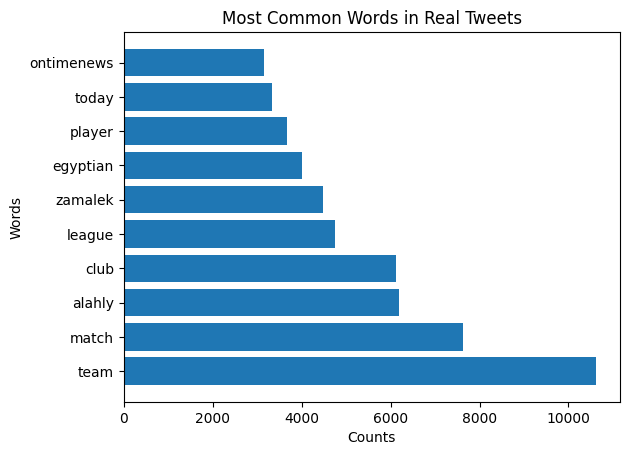

In [27]:
plot_most_common_words(df, target=1, n=10)

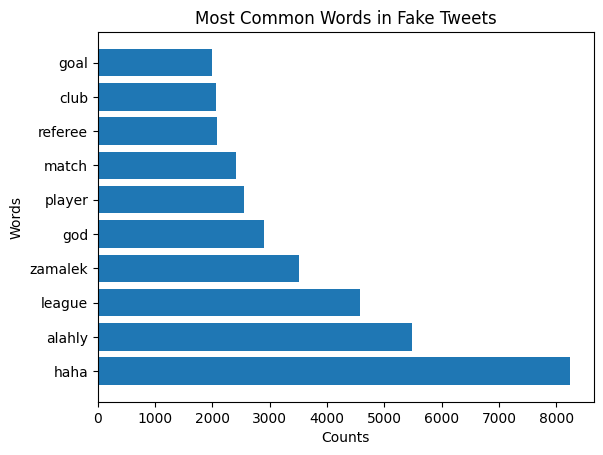

In [28]:
plot_most_common_words(df, target=0, n=10)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df['tweet']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [31]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((32659,), (32659,), (8165,), (8165,))

In [32]:
X_train

120      alshatiaia team beat kuwait friendly alexandri...
32425    say alahly account pay attention money spent m...
34506                 haha barca score fastest goal corona
32036                                    verdict albulayhi
12050           card go casemiro fifa supposed attack haha
                               ...                        
6265     comparison alahly pyramid number league table ...
11284    football association responded respectful spee...
38158     family federal nephew ahlawy understand football
860      episode ontime stadium program broadcasted ont...
15795    ahmed nagy explains technical opinion kohler c...
Name: tweet, Length: 32659, dtype: object

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
tfidf = TfidfVectorizer(max_features=2500)
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [35]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [36]:
np.count_nonzero(X_train), np.count_nonzero(X_test)

(393653, 98798)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32659, 2500), (8165, 2500), (32659,), (8165,))

In [38]:
pip install tqdm

In [43]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn.model_selection import LearningCurveDisplay
from tqdm import tqdm

In [44]:
bern = BernoulliNB()
multi = MultinomialNB()
rf = RandomForestClassifier(random_state=42)
extra = ExtraTreesClassifier(random_state=42)

In [45]:
def learning_curves(models):
  for i,model in tqdm(enumerate(models)):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, random_state=42)
    display = LearningCurveDisplay(train_sizes=train_sizes, train_scores=train_scores, test_scores=test_scores, score_name ='Score')
    display.plot()
    plt.show()

In [46]:
models = [bern, multi, rf, extra]

0it [00:00, ?it/s]

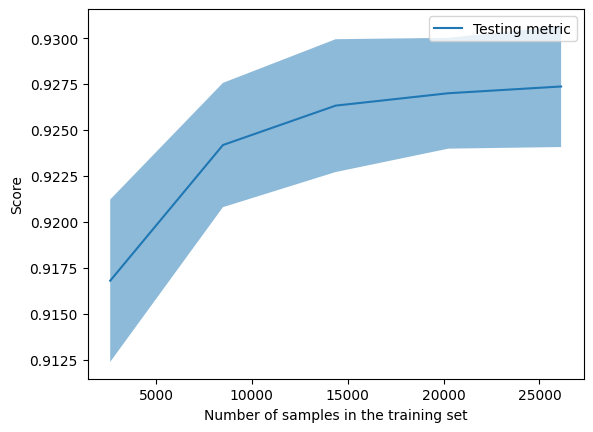

1it [00:29, 29.41s/it]

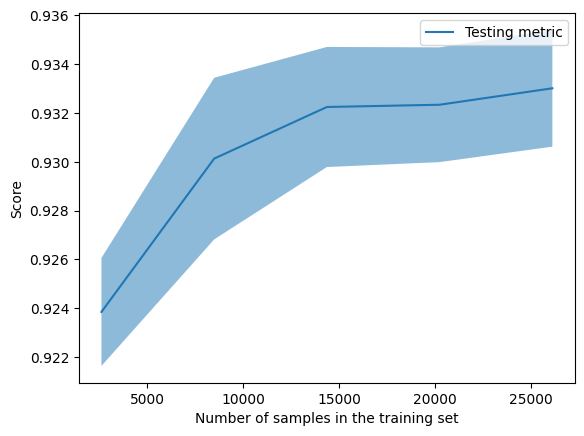

2it [00:42, 20.04s/it]

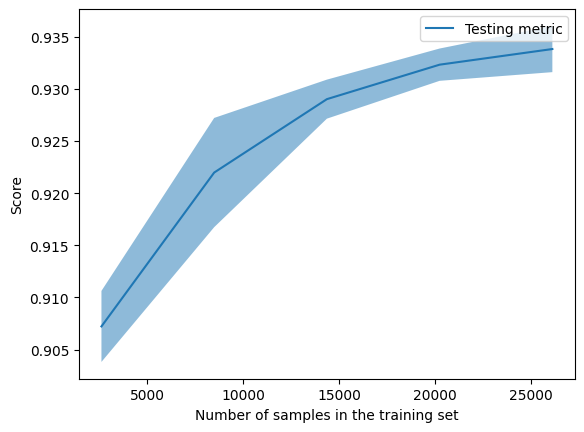

3it [14:15, 382.03s/it]

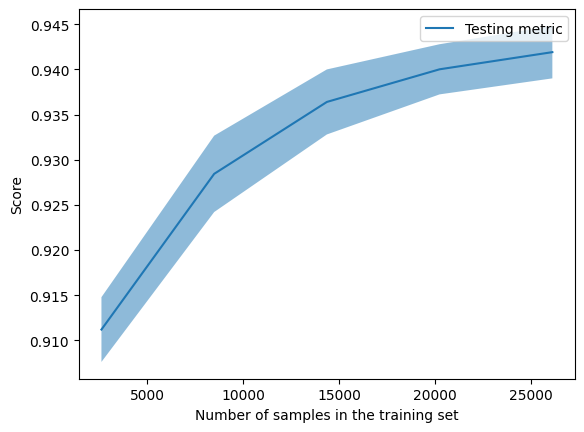

4it [1:01:38, 924.58s/it]


KeyboardInterrupt: ignored

In [47]:
learning_curves(models)

In [63]:
from sklearn.decomposition import TruncatedSVD, PCA

In [49]:
svd = TruncatedSVD()
X_train_svd = svd.fit_transform(X_train)

In [50]:
X_test_svd = svd.transform(X_test)

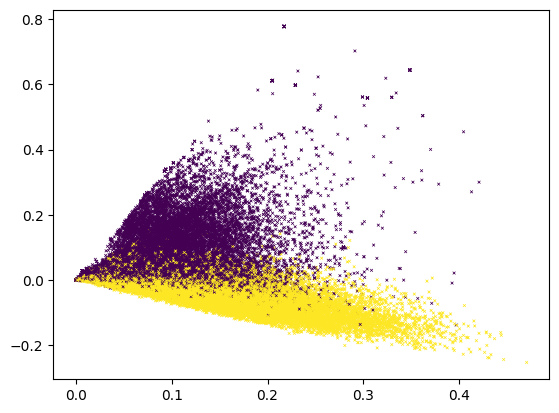

In [62]:
plt.scatter(X_train_svd[:, 0], X_train_svd[:, 1], linewidth=0.5,s=4, c=y_train, marker = 'x')

In [64]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

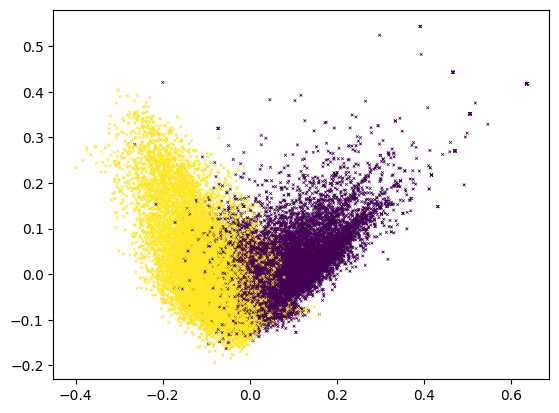

In [65]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], linewidth=0.5,s=4, c=y_train, marker = 'x')

In [75]:
#pas mal de point superposés mais on apercoit deux clusters
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score

In [76]:
bern.fit(X_train, y_train)
print(bern.score(X_test, y_test))
print(f1_score(y_test, bern.predict(X_test)))

0.9304347826086956
0.9294585196224541


In [77]:
multi.fit(X_train, y_train)
print(multi.score(X_test, y_test))
print(f1_score(y_test, multi.predict(X_test)))

0.936068585425597
0.9370629370629371


In [78]:
from sklearn.model_selection import validation_curve

In [80]:
train_scores, test_scores = validation_curve(RandomForestClassifier(), X_train, y_train, cv = 5, param_name = 'n_estimators', param_range=[100, 200, 300], verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ..n_estimators=100;, score=(train=0.999, test=0.934) total time= 1.2min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV] END ..n_estimators=200;, score=(train=0.999, test=0.934) total time= 2.2min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.4min remaining:    0.0s


[CV] END ..n_estimators=300;, score=(train=0.999, test=0.932) total time= 3.2min
[CV] END ..n_estimators=100;, score=(train=0.999, test=0.930) total time= 1.1min
[CV] END ..n_estimators=200;, score=(train=0.999, test=0.930) total time= 2.1min
[CV] END ..n_estimators=300;, score=(train=0.999, test=0.931) total time= 3.2min
[CV] END ..n_estimators=100;, score=(train=0.999, test=0.936) total time= 1.1min
[CV] END ..n_estimators=200;, score=(train=0.999, test=0.936) total time= 2.2min
[CV] END ..n_estimators=300;, score=(train=0.999, test=0.937) total time= 3.2min
[CV] END ..n_estimators=100;, score=(train=0.999, test=0.935) total time= 1.1min
[CV] END ..n_estimators=200;, score=(train=0.999, test=0.932) total time= 2.1min
[CV] END ..n_estimators=300;, score=(train=0.999, test=0.933) total time= 3.2min
[CV] END ..n_estimators=100;, score=(train=0.999, test=0.940) total time= 1.1min
[CV] END ..n_estimators=200;, score=(train=0.999, test=0.938) total time= 2.1min
[CV] END ..n_estimators=300;

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 33.3min finished


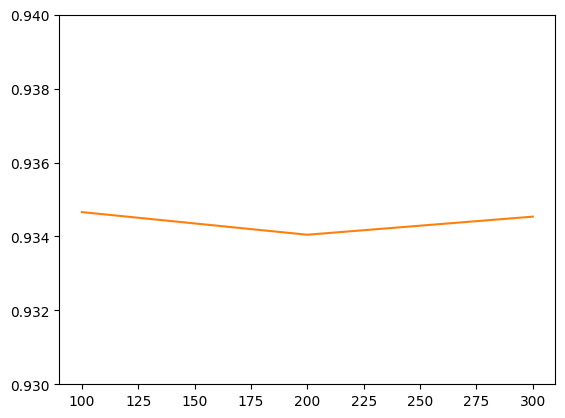

In [89]:
plt.plot([100, 200, 300], train_scores.mean(axis=1))
plt.plot([100, 200, 300], test_scores.mean(axis=1))
plt.ylim([0.93, 0.94])
plt.show()